In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1354.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_612.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1748.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_236.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1996.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1703.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_111.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1393.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1098.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/

In [3]:
import os
from PIL import Image
import numpy as np

In [4]:
dataset_dir = '/kaggle/input/the-healthcare-dataset'
image_files = []

for dirname, _, filenames in os.walk(dataset_dir):
    class_name = os.path.basename(dirname)
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append((class_name, os.path.join(dirname, filename)))

print(f"Total images found: {len(image_files)}")
print("Sample:", image_files[:5])

Total images found: 20172
Sample: [('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1354.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_612.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1748.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_236.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1996.png')]


In [5]:
map_counts = []
map_brightness = []

for class_name, filepath in image_files:
    # Map for counting images
    map_counts.append((class_name, 1))
    
    # Map for brightness
    img = Image.open(filepath).convert("L")  # grayscale
    brightness = np.mean(np.array(img))
    map_brightness.append((class_name, brightness))

In [6]:
#reduce part of the MapReduce
reduce_counts = {}
for class_name, value in map_counts:
    reduce_counts[class_name] = reduce_counts.get(class_name, 0) + value

In [9]:
brightness_sums = {}
brightness_counts = {}
for class_name, brightness in map_brightness:
    brightness_sums[class_name] = brightness_sums.get(class_name, 0) + brightness
    brightness_counts[class_name] = brightness_counts.get(class_name, 0) + 1

average_brightness = {cls: brightness_sums[cls] / brightness_counts[cls] for cls in brightness_sums}

In [10]:
#Number of images per class
print("\nNumber of images per class:")
for cls, count in reduce_counts.items():
    print(f"{cls}: {count}")


Number of images per class:
4 1 Ophthalmic Retinal Imaging: 1000
2 3 Lymphatic Tissue: 1000
1 2 Benign Melanocytic Lesions: 1004
2 7 Stromal Tissue: 1000
2 5 Muscular Tissue: 1000
2 4 Mucosal Tissue: 1000
5 5 Dental Radiographic Imaging: 1000
2 1 Cervical Cytopathological Imaging: 1000
5 1 Capsule Endoscopic Imaging: 1077
1 1 Benign Keratotic Lesions: 1000
5 3 Normal-Z-Esophagitis: 1000
5 2 Dyed-Polyps-Margins: 1013
1 4 Pre-Cancerous Lesions: 1109
5 4 Ulcerative Colitis Polyps: 1000
3 2 Thoracic Radiographic Imaging: 1000
2 6 Normal Tissue: 1000
1 3 Malignant Lesions: 996
2 2 Adipose Tissue: 1000
3 1 Orthopedic Radiographic Imaging: 973
2 8 Tumor Tissue: 1000


In [11]:
#Average brightness per class
print("\nAverage brightness per class:")
for cls, avg in average_brightness.items():
    print(f"{cls}: {avg:.2f}")


Average brightness per class:
4 1 Ophthalmic Retinal Imaging: 144.42
2 3 Lymphatic Tissue: 145.96
1 2 Benign Melanocytic Lesions: 153.19
2 7 Stromal Tissue: 158.18
2 5 Muscular Tissue: 159.23
2 4 Mucosal Tissue: 172.06
5 5 Dental Radiographic Imaging: 105.14
2 1 Cervical Cytopathological Imaging: 169.26
5 1 Capsule Endoscopic Imaging: 86.83
1 1 Benign Keratotic Lesions: 142.16
5 3 Normal-Z-Esophagitis: 121.83
5 2 Dyed-Polyps-Margins: 80.01
1 4 Pre-Cancerous Lesions: 134.81
5 4 Ulcerative Colitis Polyps: 84.19
3 2 Thoracic Radiographic Imaging: 121.95
2 6 Normal Tissue: 155.09
1 3 Malignant Lesions: 137.17
2 2 Adipose Tissue: 202.33
3 1 Orthopedic Radiographic Imaging: 65.80
2 8 Tumor Tissue: 146.00


In [12]:
#feature extraction
features = []
labels = []

for class_name, filepath in image_files:
    img = Image.open(filepath).convert("L").resize((64, 64))  # resize to reduce dimensionality
    hist = np.histogram(np.array(img).flatten(), bins=64, range=(0, 256))[0]  # 64-bin histogram
    features.append(hist)
    labels.append(class_name)

features = np.array(features)

In [13]:
#Encode labels into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

                                       precision    recall  f1-score   support

         1 1 Benign Keratotic Lesions       0.41      0.36      0.38       182
       1 2 Benign Melanocytic Lesions       0.57      0.53      0.55       219
                1 3 Malignant Lesions       0.45      0.22      0.29       212
            1 4 Pre-Cancerous Lesions       0.52      0.69      0.59       217
2 1 Cervical Cytopathological Imaging       0.78      0.85      0.81       204
                   2 2 Adipose Tissue       0.91      0.98      0.95       208
                 2 3 Lymphatic Tissue       0.87      0.85      0.86       181
                   2 4 Mucosal Tissue       0.71      0.78      0.74       196
                  2 5 Muscular Tissue       0.80      0.71      0.76       191
                    2 6 Normal Tissue       0.64      0.69      0.66       192
                   2 7 Stromal Tissue       0.77      0.76      0.76       212
                     2 8 Tumor Tissue       0.79   

Text(0.5, 1.0, 'Confusion Matrix')

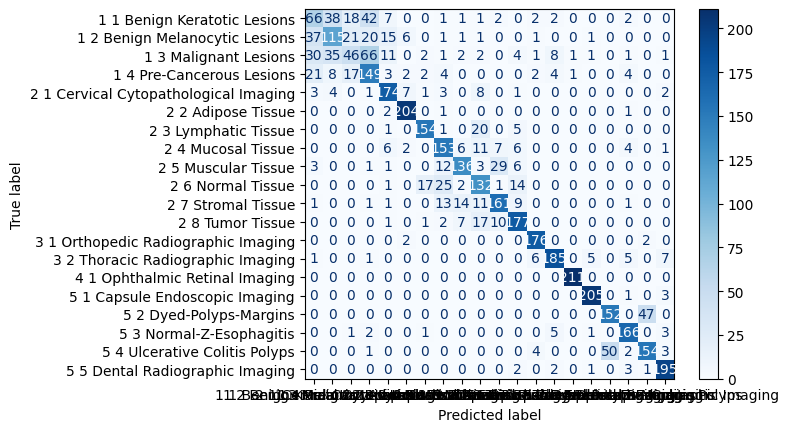

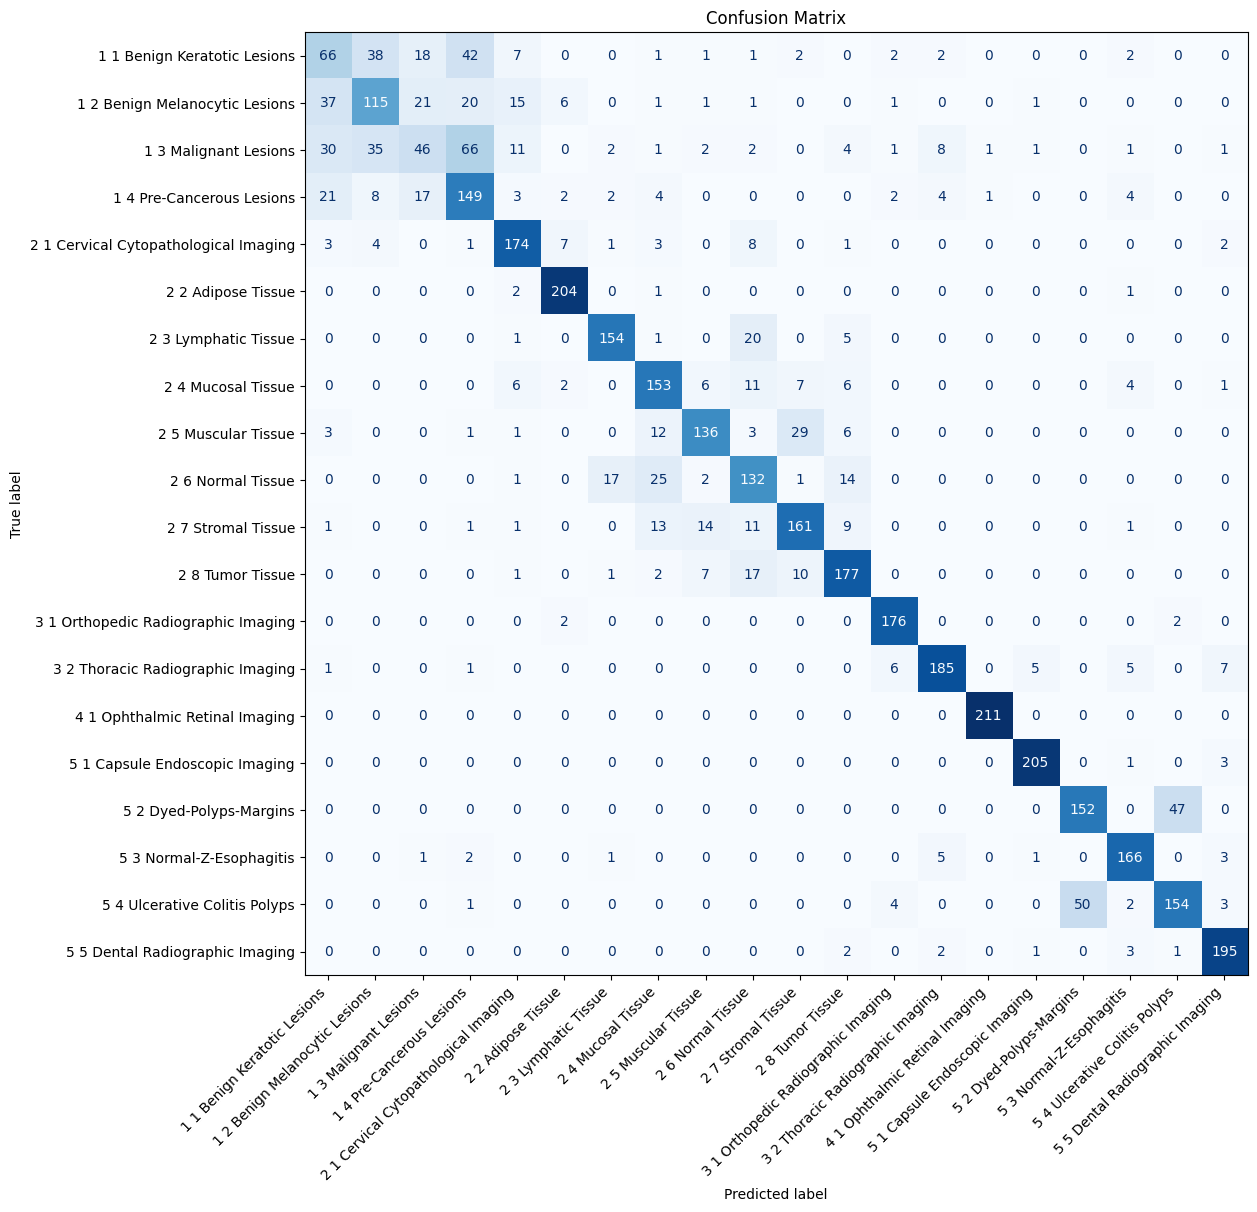

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
fig, ax = plt.subplots(figsize=(20, 12))  # adjust as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix")
#plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

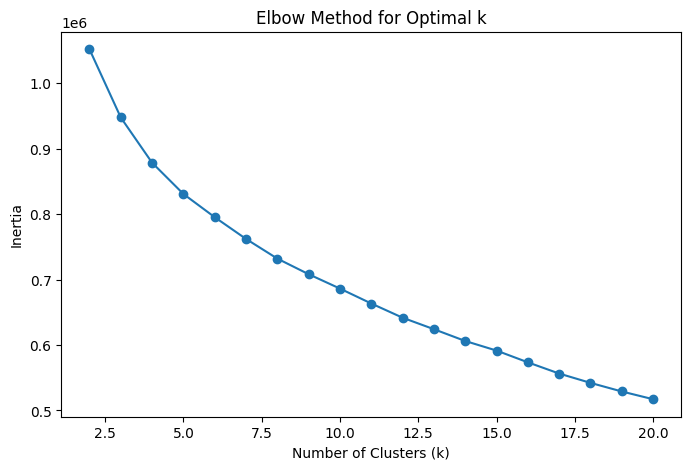

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(2, 21)  # test k from 2 to 20

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [41]:
from sklearn.cluster import KMeans

num_clusters = 10  # you can try 20 to match original classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

cluster_labels = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(labels, cluster_labels)
nmi = normalized_mutual_info_score(labels, cluster_labels)

print(f"ARI: {ari:.2f}, NMI: {nmi:.2f}")

ARI: 0.15, NMI: 0.35


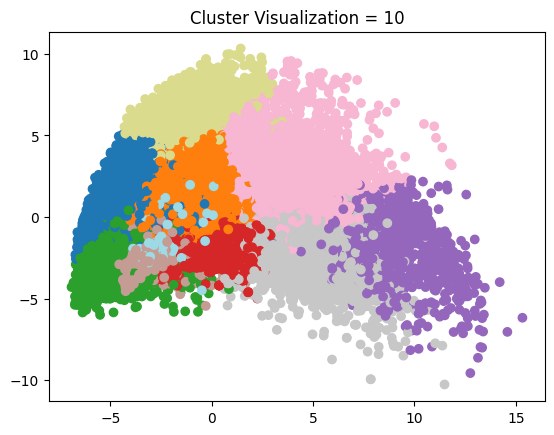

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

plt.scatter(features_2d[:,0], features_2d[:,1], c=cluster_labels, cmap='tab20')
plt.title("Cluster Visualization = 10")
plt.show()

In [45]:
import pandas as pd

df = pd.DataFrame({'True_Label': labels, 'Cluster': cluster_labels})
print(df.groupby(['Cluster', 'True_Label']).size())

Cluster  True_Label                           
0        1 1 Benign Keratotic Lesions             265
         1 2 Benign Melanocytic Lesions           297
         1 3 Malignant Lesions                    249
         1 4 Pre-Cancerous Lesions                310
         2 1 Cervical Cytopathological Imaging     51
                                                 ... 
9        2 7 Stromal Tissue                         1
         2 8 Tumor Tissue                          19
         3 2 Thoracic Radiographic Imaging          3
         4 1 Ophthalmic Retinal Imaging             6
         5 3 Normal-Z-Esophagitis                   1
Length: 140, dtype: int64


In [47]:
from sklearn.cluster import KMeans

num_clusters = 20  # you can try 20 to match original classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

cluster_labels2 = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
ari = adjusted_rand_score(labels, cluster_labels2)
nmi = normalized_mutual_info_score(labels, cluster_labels2)

print(f"ARI: {ari:.2f}, NMI: {nmi:.2f}")

ARI: 0.16, NMI: 0.37


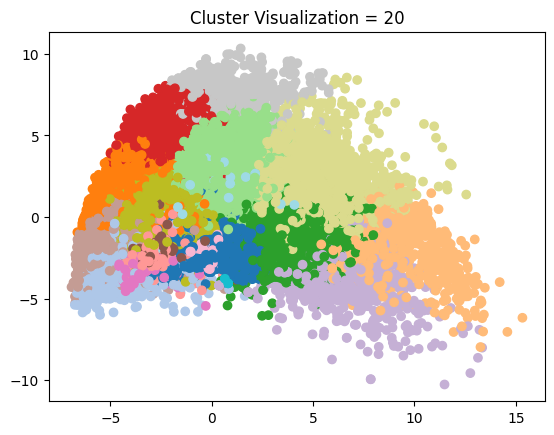

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

plt.scatter(features_2d[:,0], features_2d[:,1], c=cluster_labels2, cmap='tab20')
plt.title("Cluster Visualization = 20")
plt.show()

In [50]:
df = pd.DataFrame({'True_Label': labels, 'Cluster': cluster_labels2})
print(df.groupby(['Cluster', 'True_Label']).size())

Cluster  True_Label                         
0        1 1 Benign Keratotic Lesions            88
         1 2 Benign Melanocytic Lesions          31
         1 3 Malignant Lesions                  131
         1 4 Pre-Cancerous Lesions              192
         3 1 Orthopedic Radiographic Imaging    665
                                               ... 
19       2 4 Mucosal Tissue                       6
         2 5 Muscular Tissue                     51
         2 6 Normal Tissue                        1
         2 8 Tumor Tissue                        19
         3 2 Thoracic Radiographic Imaging        1
Length: 202, dtype: int64


In [53]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2025-10-07 16:45:01.550138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759855501.767821      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759855501.823273      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [55]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [56]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),  # resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 16138 images belonging to 1 classes.


In [58]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4034 images belonging to 1 classes.


In [69]:
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='sigmoid', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='sigmoid'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='sigmoid'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
])

from tensorflow.keras.metrics import Precision, Recall, AUC, TopKCategoricalAccuracy

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc'),
        TopKCategoricalAccuracy(k=3, name='top_3_accuracy')
    ]
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/5
505/505 ━━━━━━━━━━━━━━━━━━━━ 657s 1s/step - accuracy: 0.7410 - auc: 0.0000e+00 - loss: 0.0000e+00 - precision: 1.0000 - recall: 0.7410 - top_3_accuracy: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000 - val_top_3_accuracy: 1.0000
Epoch 2/5
505/505 ━━━━━━━━━━━━━━━━━━━━ 640s 1s/step - accuracy: 0.7379 - auc: 0.0000e+00 - loss: 0.0000e+00 - precision: 1.0000 - recall: 0.7379 - top_3_accuracy: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000 - val_top_3_accuracy: 1.0000
Epoch 3/5
505/505 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 0.7375 - auc: 0.0000e+00 - loss: 0.0000e+00 - precision: 1.0000 - recall: 0.7375 - top_3_accuracy: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000 - val_top_3_accuracy: 1.0000
Epoch 4/5
505/505 ━━━━━━━━━━━━━━━━━━━━ 693s 1s/step - accuracy: 

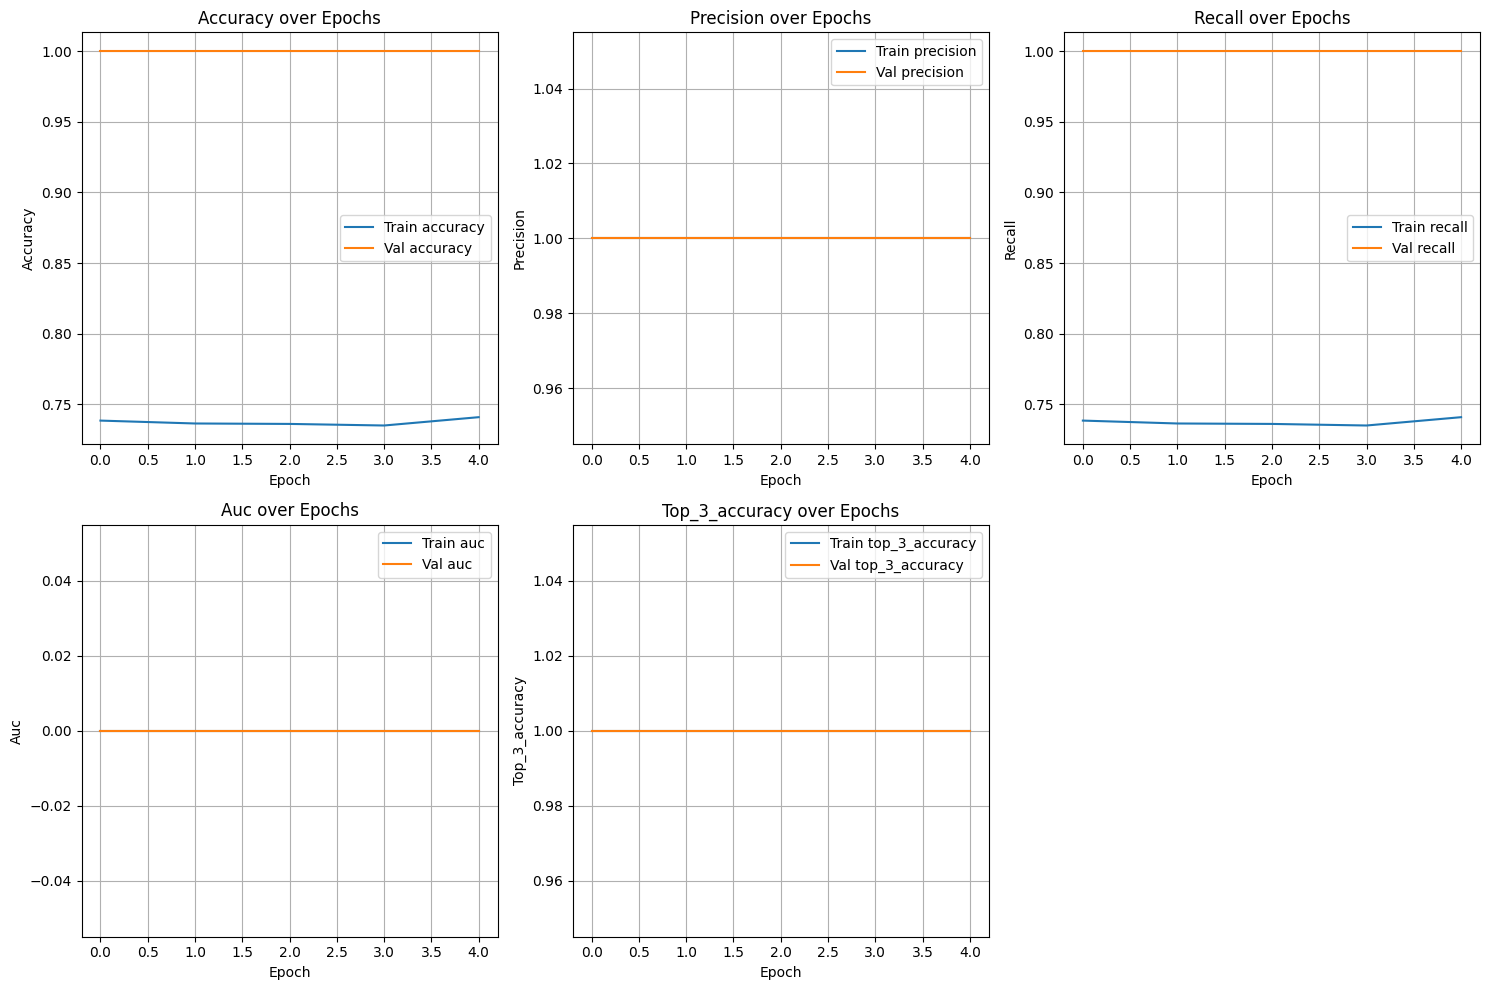

In [74]:
def plot_training_metrics(history):
    metrics = ['accuracy', 'precision', 'recall', 'auc', 'top_3_accuracy']
    
    plt.figure(figsize=(15,10))
    
    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i+1)
        plt.plot(history.history[metric], label=f'Train {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
        plt.title(f'{metric.capitalize()} over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_training_metrics(history)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Class labels
labels = list(validation_generator.class_indices.keys())

# Print detailed report
print(classification_report(y_true, y_pred, target_names=labels))